Processing day1_e_above.jpg...
Leaf Damage Detected


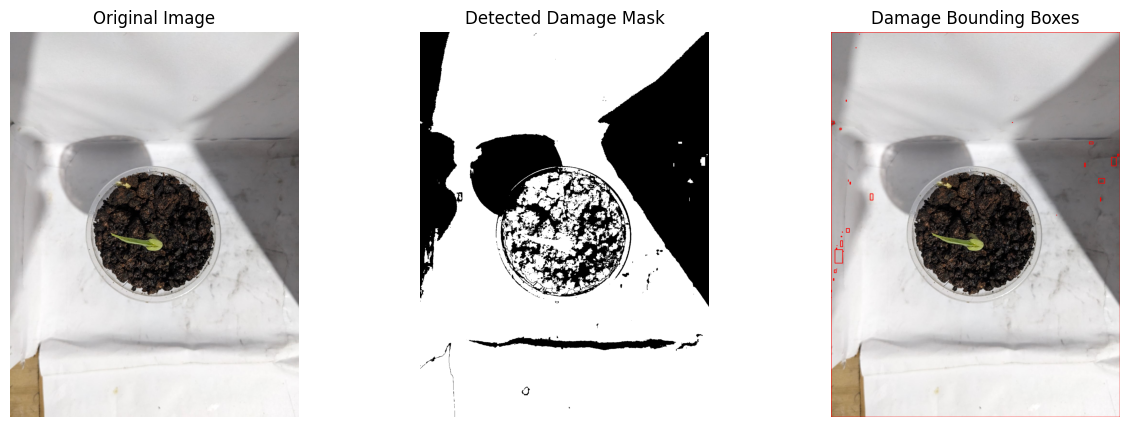

Processing day1_m_above.jpg...
Leaf Damage Detected


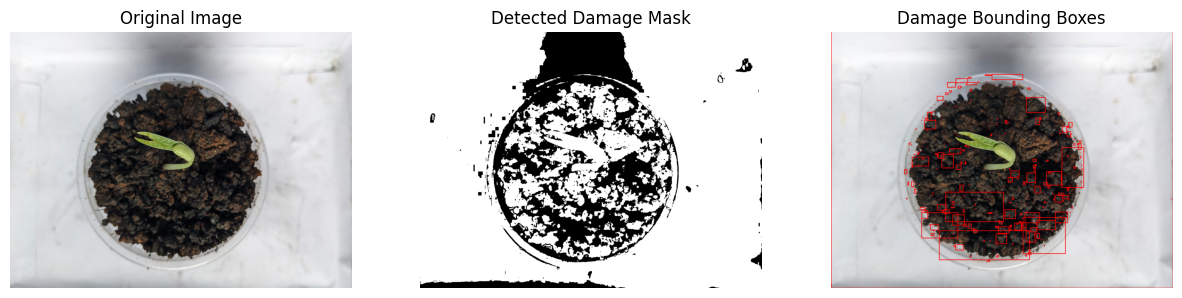

Processing day2_e_above.jpg...
Leaf Damage Detected


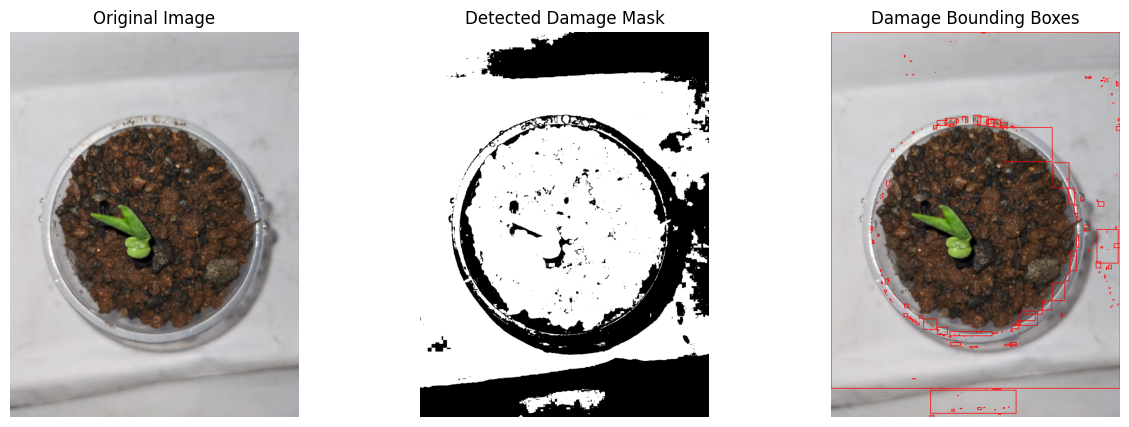

Processing day2_m_above.jpg...
Leaf Damage Detected


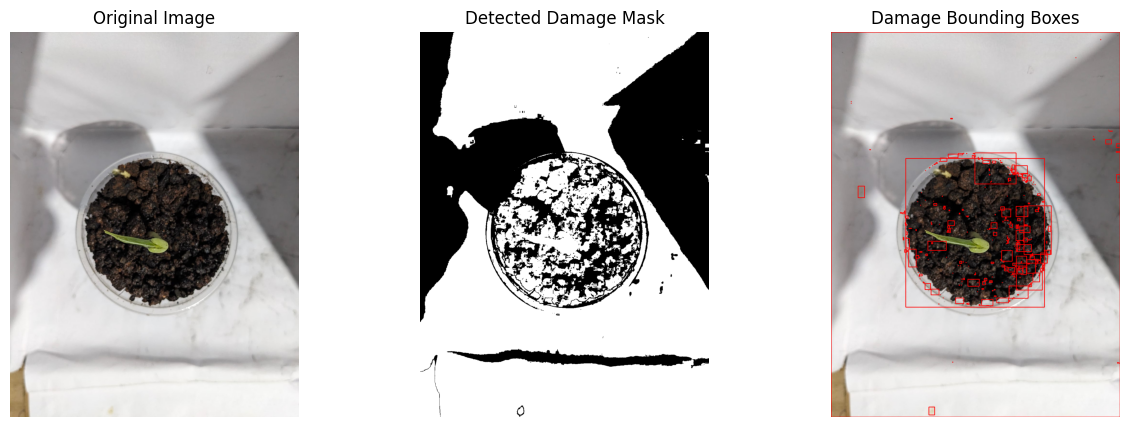

Processing day3_e_above.jpg...
Leaf Damage Detected


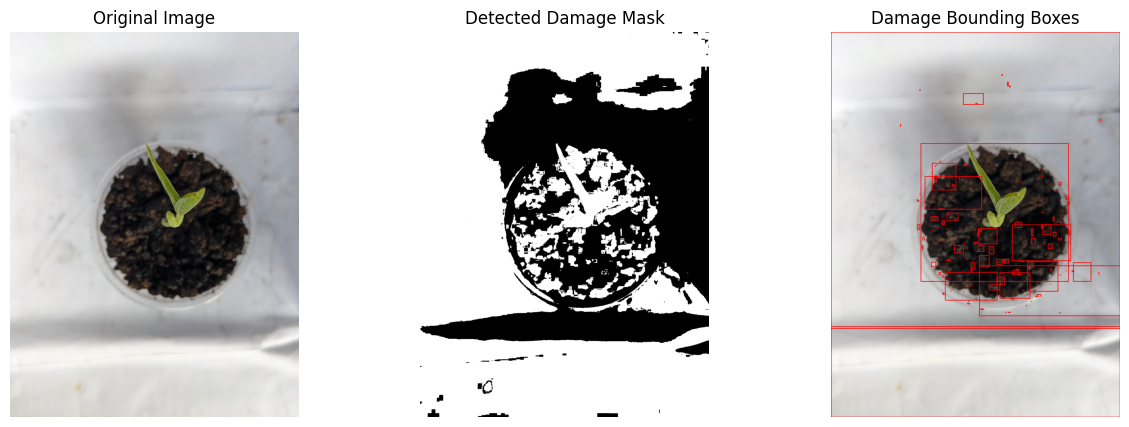

Processing day3_m_above.jpg...
Leaf Damage Detected


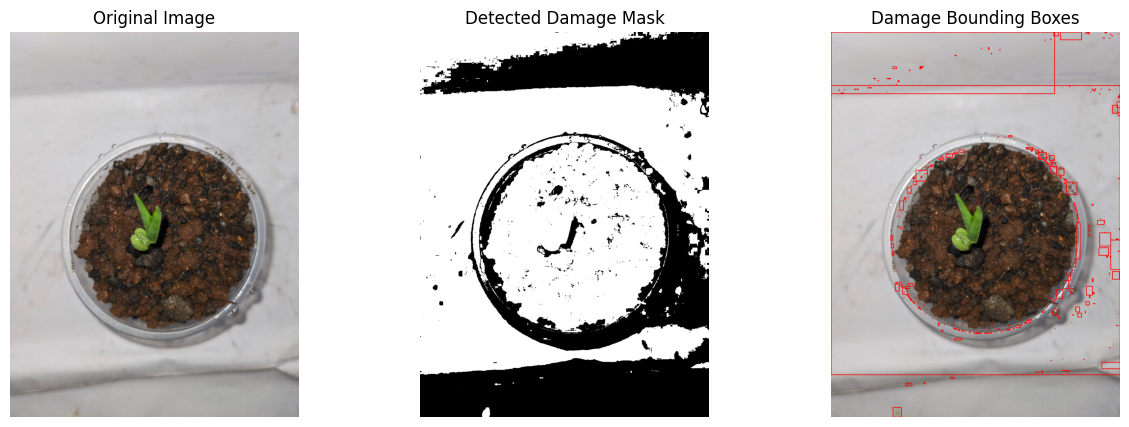

Processing day4_e_above.jpg...
Leaf Damage Detected


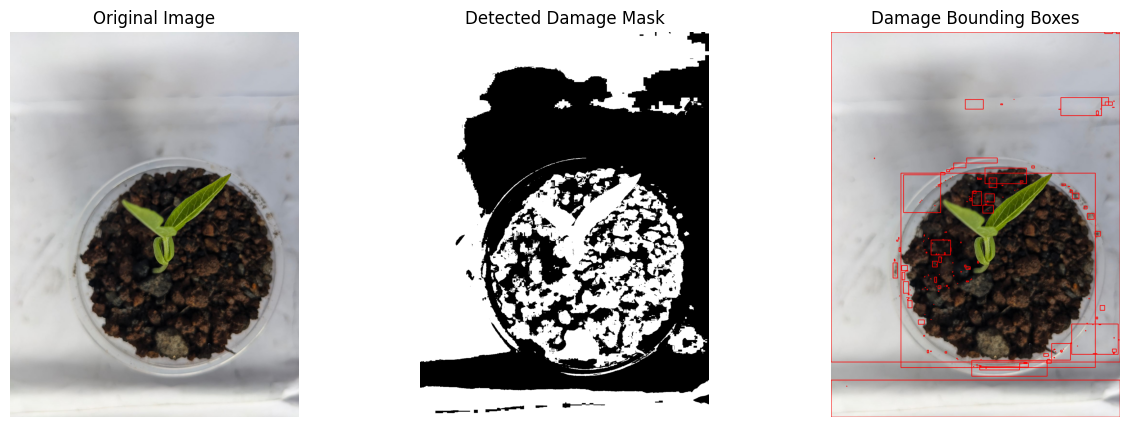

Processing day4_m_above.jpg...
Leaf Damage Detected


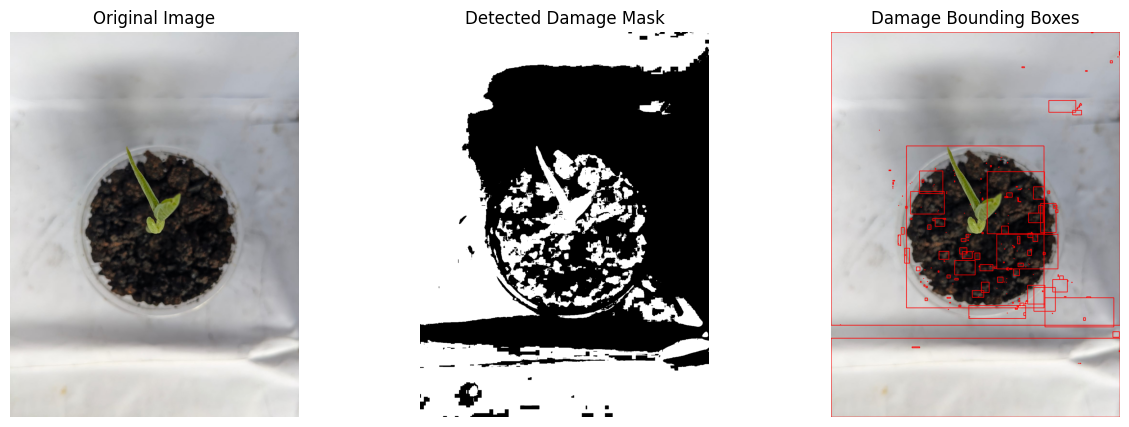

Processing day5_e_above.jpg...
Leaf Damage Detected


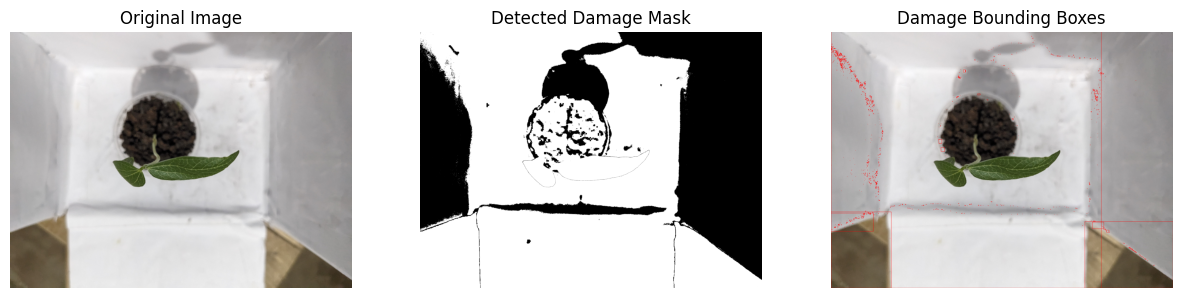

Processing day5_m_above.jpg...
Leaf Damage Detected


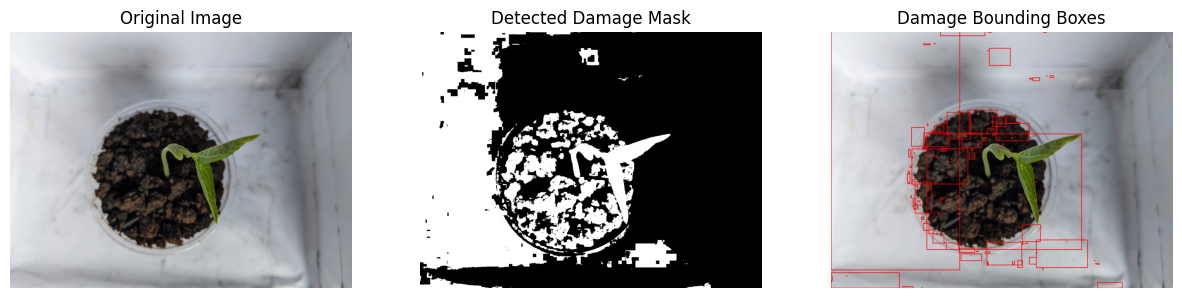

Processing day6_e_above.jpg...
Leaf Damage Detected


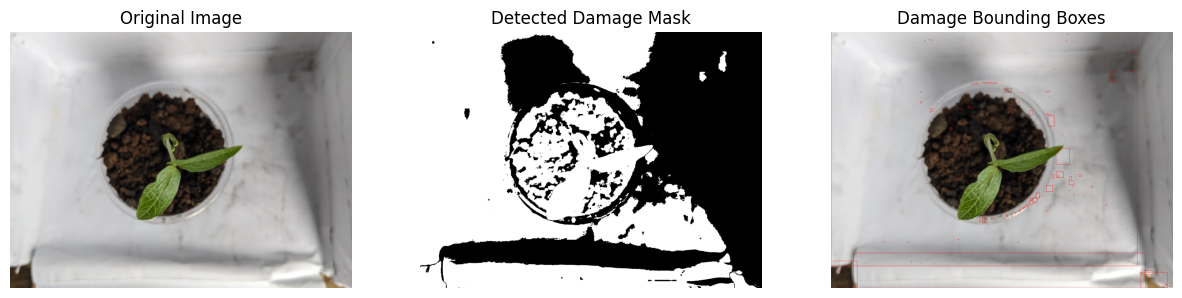

Processing day6_m_above.jpg...
Leaf Damage Detected


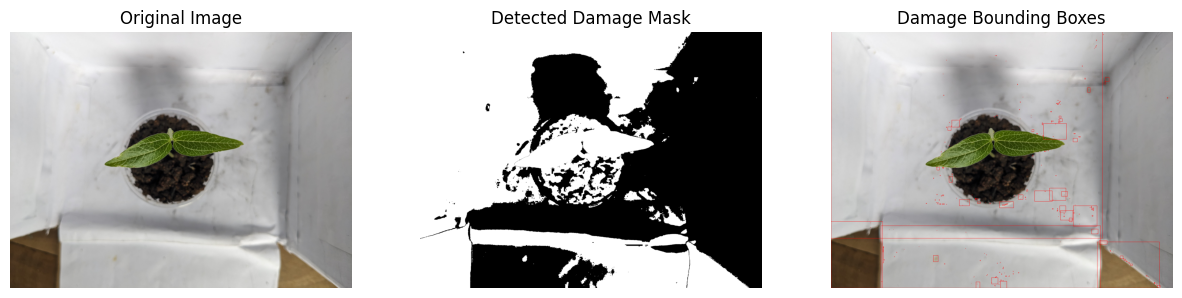

Processing day7_e_above.jpg...
Leaf Damage Detected


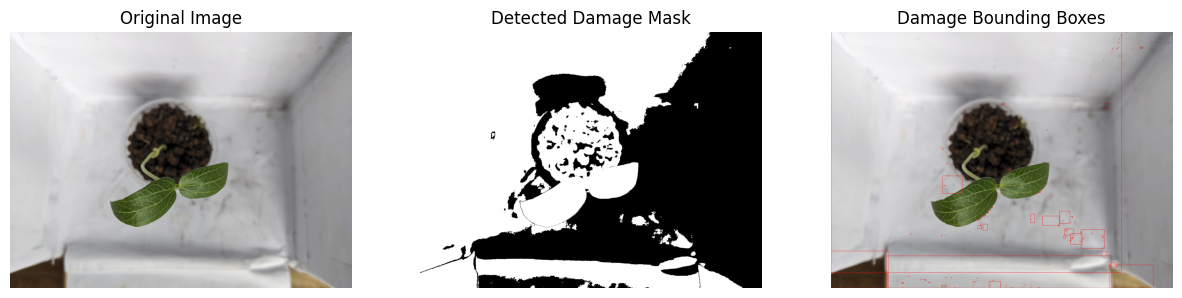

Processing day7_m_above.jpg...
Leaf Damage Detected


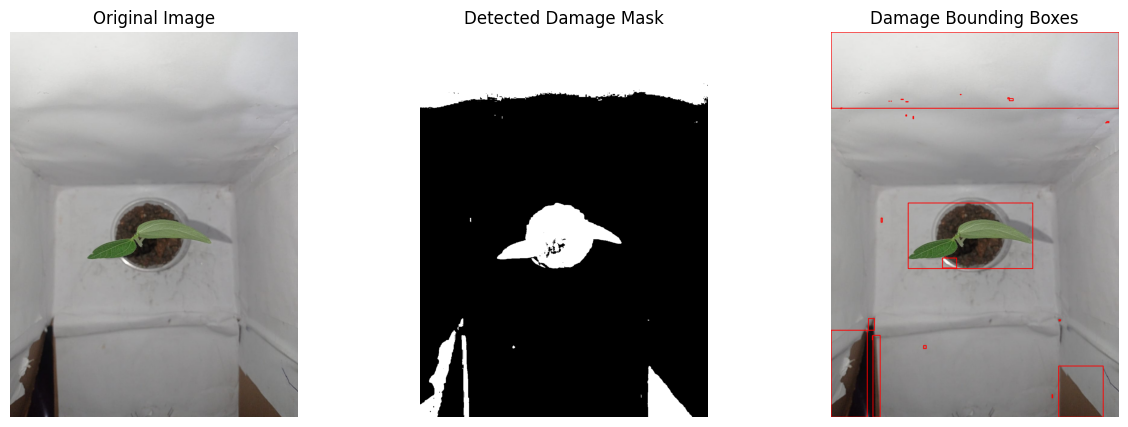

File day8_e_above.jpg not found.
Processing day8_m_above.jpg...
Leaf Damage Detected


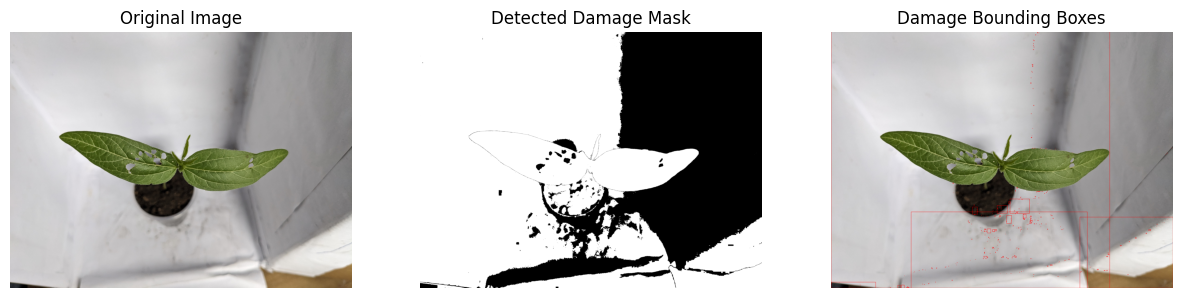


Performance Summary:
Total Time Taken: 71.03 seconds
Average Execution Time per Image: 4.73 seconds
Number of Images Processed: 15


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import time 

def analyze_plant_health(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not read {image_path}")
        return
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Yellow/Brown patches
    lower_damage = np.array([5, 20, 20])
    upper_damage = np.array([55, 255, 255])
    mask_damage = cv2.inRange(hsv, lower_damage, upper_damage)

    # White patches
    lower_white = np.array([0, 0, 190])
    upper_white = np.array([180, 10, 255])
    mask_white = cv2.inRange(hsv, lower_white, upper_white)

    # Combine masks
    mask_combined = cv2.bitwise_or(mask_damage, mask_white)

    # Contours
    contours, _ = cv2.findContours(mask_combined, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw boxes
    result_image = image.copy()
    total_damage_area = 0
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(result_image, (x, y), (x + w, y + h), (255, 0, 0), 2)
        total_damage_area += w * h

    # Damage percentage
    image_area = image.shape[0] * image.shape[1]
    damage_percentage = (total_damage_area / image_area) * 100
    if damage_percentage < 0.001:
        print("No Damage Detected")
    else:
        print("Leaf Damage Detected")

    # Display results
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(image)
    ax[0].set_title("Original Image")
    ax[0].axis("off")

    ax[1].imshow(mask_combined, cmap='gray')
    ax[1].set_title("Detected Damage Mask")
    ax[1].axis("off")

    ax[2].imshow(result_image)
    ax[2].set_title("Damage Bounding Boxes")
    ax[2].axis("off")

    plt.show()

# Image directory
directory = "images"

# Generate filenames: day1_e_above.jpg to day8_m_above.jpg
image_filenames = [
    f"day{day}_{view}.jpg"
    for day in range(1, 9)
    for view in ['e_above', 'm_above']
]

# Timer setup
total_time = 0
image_total_time = 0
num_images = 0
start_time = time.time()

# Process images
for filename in image_filenames:
    image_path = os.path.join(directory, filename)

    if os.path.exists(image_path):
        print(f"Processing {filename}...")

        image_start_time = time.time()
        analyze_plant_health(image_path)
        image_end_time = time.time()

        image_total_time += (image_end_time - image_start_time)
        num_images += 1
    else:
        print(f"File {filename} not found.")

end_time = time.time()
total_time = end_time - start_time

# Summary
average_time_per_image = image_total_time / num_images if num_images > 0 else 0
print(f"\nPerformance Summary:")
print(f"Total Time Taken: {total_time:.2f} seconds")
print(f"Average Execution Time per Image: {average_time_per_image:.2f} seconds")
print(f"Number of Images Processed: {num_images}")
